# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification </span> </b>

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [5]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [6]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [7]:
# iris dataset
iris.shape

(150, 6)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [9]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,2
6,5.4,3.9,1.7,0.4,1,2
7,4.6,3.4,1.4,0.3,1,1
9,4.4,2.9,1.4,0.2,1,1
10,4.9,3.1,1.5,0.1,1,1
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,2
2,4.9,3.0,1.4,0.2,1,1
1,5.1,3.5,1.4,0.2,1,1


In [10]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
iris_train.shape

(120, 6)

In [12]:
# test data shape
iris_test.shape

(30, 6)

In [13]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
8,5.0,3.4,1.5,0.2,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
14,4.3,3.0,1.1,0.1,1
15,5.8,4.0,1.2,0.2,1
13,4.8,3.0,1.4,0.1,1
7,4.6,3.4,1.4,0.3,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [14]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
6,5.4,3.9,1.7,0.4,1
12,4.8,3.4,1.6,0.2,1
19,5.7,3.8,1.7,0.3,1
31,4.8,3.1,1.6,0.2,1
38,4.9,3.6,1.4,0.1,1
45,5.1,3.8,1.9,0.4,1
34,5.5,4.2,1.4,0.2,1
11,5.4,3.7,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
4,4.6,3.1,1.5,0.2,1


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoClassifier instance
# Using only 'xgboost' for model training
# Keeping early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(include=['xgboost'],
                     verbose=2,
                     max_runtime_secs=300)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
species,INTEGER,120,0,None,0,120,0,0.0,100.0
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0



Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
std,42.54,0.835,0.428,1.764,0.758,0.81
25%,39.75,5.1,2.8,1.5,0.3,1
50%,73.5,5.8,3,4.35,1.3,2
75%,110.5,6.4,3.3,5.1,1.8,3
max,150,7.9,4.4,6.7,2.5,3
min,1,4.3,2,1,0.1,1
mean,75.275,5.837,3.04,3.768,1.212,2
count,120,120,120,120,120,120



Target Column Distribution:


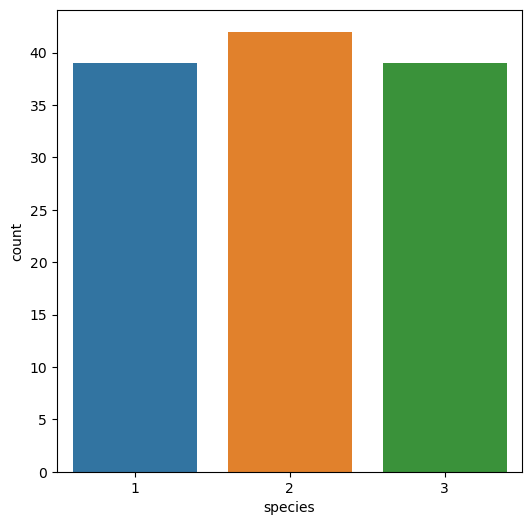

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


Analysis complete. No action taken.                                                     


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


sepal_length,sepal_width,petal_length,petal_width,species,id
5.7,2.9,4.2,1.3,2,15
5.1,2.5,3.0,1.1,2,13
5.6,2.7,4.2,1.3,2,21
5.6,2.8,4.9,2.0,3,11
5.7,2.6,3.5,1.0,2,12
7.7,3.8,6.7,2.2,3,20
5.1,3.4,1.5,0.2,1,10
6.0,2.2,5.0,1.5,3,18
5.0,2.0,3.5,1.0,2,14
5.0,3.2,1.2,0.2,1,22


sepal_length,sepal_width,petal_length,petal_width,species,id
5.4,3.4,1.5,0.4,1,31
6.3,3.3,4.7,1.6,2,26
5.0,3.4,1.6,0.4,1,106
6.3,3.4,5.6,2.4,3,27
6.5,2.8,4.6,1.5,2,28
6.1,3.0,4.6,1.4,2,84
6.4,3.2,5.3,2.3,3,30
5.6,2.9,3.6,1.3,2,102
5.6,2.5,3.9,1.1,2,67
6.0,2.9,4.5,1.5,2,103


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


['sepal_width']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711271899453845"'15


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711270799217283"'15
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711271433304460"'


['petal_length', 'sepal_length', 'sepal_width', 'petal_width']


['petal_length', 'sepal_length', 'sepal_width', 'petal_width']


species,id,petal_length,sepal_length,sepal_width,petal_width
1,50,0.05357142857142854,0.088235294117647,0.6666666666666666,0.08333333333333333
1,92,0.05357142857142854,0.26470588235294124,0.6666666666666666,0.04166666666666667
3,118,0.6785714285714287,0.588235294117647,0.2777777777777778,0.7083333333333334
1,56,0.07142857142857141,0.23529411764705874,0.8888888888888887,0.08333333333333333
1,90,0.07142857142857141,0.17647058823529427,0.5,0.04166666666666667
3,94,0.6964285714285715,0.588235294117647,0.16666666666666657,0.75
3,79,0.8035714285714286,0.588235294117647,0.3888888888888888,0.7083333333333334
3,36,0.6964285714285715,0.411764705882353,0.16666666666666657,0.7916666666666666
3,100,0.8392857142857142,0.7058823529411765,0.16666666666666657,0.7083333333333334
1,23,0.017857142857142835,0.4411764705882352,1.0,0.04166666666666667


species,id,petal_length,sepal_length,sepal_width,petal_width
1,31,0.07142857142857141,0.323529411764706,0.6666666666666666,0.12500000000000003
1,116,0.05357142857142854,0.14705882352941174,0.44444444444444436,0.08333333333333333
3,134,0.8571428571428573,0.8235294117647057,0.44444444444444436,0.8333333333333334
1,115,0.10714285714285712,0.323529411764706,0.6666666666666666,0.04166666666666667
1,135,-0.017857142857142873,0.088235294117647,0.7777777777777778,0.04166666666666667
3,130,0.8392857142857142,0.6470588235294118,0.44444444444444436,0.8750000000000001
3,122,0.6071428571428572,0.17647058823529427,0.16666666666666657,0.6666666666666666
3,30,0.7499999999999999,0.6176470588235295,0.5555555555555556,0.9166666666666666
3,108,0.6785714285714287,0.5294117647058822,0.44444444444444436,0.7083333333333334
1,126,0.035714285714285705,0.058823529411764754,0.055555555555555365,0.08333333333333333


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


['r_sepal_length', 'r_sepal_width', 'r_petal_length', 'r_petal_width']


species,id,r_sepal_length,r_sepal_width,r_petal_length,r_petal_width
1,50,0.088235294117647,0.6666666666666666,0.05357142857142854,0.08333333333333333
1,92,0.26470588235294124,0.6666666666666666,0.05357142857142854,0.04166666666666667
3,118,0.588235294117647,0.2777777777777778,0.6785714285714287,0.7083333333333334
1,56,0.23529411764705874,0.8888888888888887,0.07142857142857141,0.08333333333333333
1,90,0.17647058823529427,0.5,0.07142857142857141,0.04166666666666667
3,94,0.588235294117647,0.16666666666666657,0.6964285714285715,0.75
3,79,0.588235294117647,0.3888888888888888,0.8035714285714286,0.7083333333333334
3,36,0.411764705882353,0.16666666666666657,0.6964285714285715,0.7916666666666666
3,100,0.7058823529411765,0.16666666666666657,0.8392857142857142,0.7083333333333334
1,23,0.4411764705882352,1.0,0.017857142857142835,0.04166666666666667


species,id,r_sepal_length,r_sepal_width,r_petal_length,r_petal_width
1,31,0.323529411764706,0.6666666666666666,0.07142857142857141,0.12500000000000003
1,116,0.14705882352941174,0.44444444444444436,0.05357142857142854,0.08333333333333333
3,134,0.8235294117647057,0.44444444444444436,0.8571428571428573,0.8333333333333334
1,115,0.323529411764706,0.6666666666666666,0.10714285714285712,0.04166666666666667
1,135,0.088235294117647,0.7777777777777778,-0.017857142857142873,0.04166666666666667
3,130,0.6470588235294118,0.44444444444444436,0.8392857142857142,0.8750000000000001
3,122,0.17647058823529427,0.16666666666666657,0.6071428571428572,0.6666666666666666
3,30,0.6176470588235295,0.5555555555555556,0.7499999999999999,0.9166666666666666
3,108,0.5294117647058822,0.44444444444444436,0.6785714285714287,0.7083333333333334
1,126,0.058823529411764754,0.055555555555555365,0.035714285714285705,0.08333333333333333


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


species,id,sepal_length,sepal_width,petal_length,petal_width
2,63,0.323529411764706,0.44444444444444436,0.6071428571428572,0.5833333333333334
2,35,0.5294117647058822,0.33333333333333315,0.6428571428571429,0.4583333333333333
2,65,0.5294117647058822,0.3888888888888888,0.6428571428571429,0.5416666666666666
3,136,0.7058823529411765,0.6111111111111109,0.8214285714285714,1.0
3,112,0.8529411764705882,0.44444444444444436,0.8392857142857142,0.625
3,34,0.8529411764705882,0.7777777777777778,0.8928571428571429,1.0
3,47,0.8823529411764705,0.3888888888888888,0.9285714285714285,0.7083333333333334
3,18,0.5,0.0,0.6964285714285715,0.5833333333333334
3,114,0.5588235294117647,0.6666666666666666,0.767857142857143,0.9166666666666666
2,80,0.5588235294117647,0.3888888888888888,0.5714285714285714,0.5


species,id,sepal_length,sepal_width,petal_length,petal_width
3,30,0.6176470588235295,0.5555555555555556,0.7499999999999999,0.9166666666666666
1,31,0.323529411764706,0.6666666666666666,0.07142857142857141,0.12500000000000003
2,103,0.5,0.3888888888888888,0.6071428571428572,0.5833333333333334
3,29,0.6176470588235295,0.2777777777777778,0.7499999999999999,0.75
2,26,0.588235294117647,0.6111111111111109,0.6428571428571429,0.625
1,106,0.2058823529411765,0.6666666666666666,0.08928571428571429,0.12500000000000003
2,28,0.6470588235294118,0.33333333333333315,0.625,0.5833333333333334
2,84,0.5294117647058822,0.44444444444444436,0.625,0.5416666666666666
1,77,0.088235294117647,0.5555555555555556,0.05357142857142854,0.04166666666666667
2,102,0.3823529411764705,0.3888888888888888,0.44642857142857145,0.5


['col_0', 'col_1']


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
Total number of models for xgboost : 768
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_11                                                                                


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
1,2,xgboost,lasso,0.291667,0.291667,0.291667,0.291667,0.097222,0.333333,0.150538,0.085069,0.291667,0.131720
2,3,xgboost,rfe,0.291667,0.291667,0.291667,0.291667,0.097222,0.333333,0.150538,0.085069,0.291667,0.131720


In [17]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
1,2,xgboost,lasso,0.291667,0.291667,0.291667,0.291667,0.097222,0.333333,0.150538,0.085069,0.291667,0.131720
2,3,xgboost,rfe,0.291667,0.291667,0.291667,0.291667,0.097222,0.333333,0.150538,0.085069,0.291667,0.131720


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

xgboost pca

 Prediction : 
   species   id  Prediction  Confidence_Lower  Confidence_upper
0        2   28           2             0.750             0.750
1        3   30           3             1.000             1.000
2        1   31           1             0.875             0.875
3        1  106           1             0.875             0.875
4        2   84           2             0.875             0.875
5        1   77           1             0.875             0.875
6        2   67           2             1.000             1.000
7        3   29           3             1.000             1.000
8        3   27           3             1.000             1.000
9        2   26           2             0.750             0.750

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision  Recall        F1  Support
SeqNum                                                                                     
0               1  CLASS_1        7        0        0   1.0

array([[7, 0, 0],
       [0, 9, 0],
       [0, 2, 6]], dtype=int64)

In [21]:
# Printing prediction
prediction.head()

species,id,Prediction,Confidence_Lower,Confidence_upper
1,126,1,0.75,0.75
1,135,1,0.875,0.875
1,106,1,0.875,0.875
1,115,1,0.875,0.875
2,103,2,0.875,0.875
2,28,2,0.75,0.75
2,107,2,0.75,0.75
1,31,1,0.875,0.875
1,77,1,0.875,0.875
1,116,1,0.875,0.875


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping irrelevent columns :


sepal_length,sepal_width,petal_length,petal_width,species
5.0,3.3,1.4,0.2,1
6.2,2.8,4.8,1.8,3
5.0,2.3,3.3,1.0,2
7.4,2.8,6.1,1.9,3
5.5,4.2,1.4,0.2,1
5.4,3.7,1.5,0.2,1
6.7,3.0,5.0,1.7,2
6.0,3.0,4.8,1.8,3
4.9,3.6,1.4,0.1,1
6.1,2.6,5.6,1.4,3



Updated dataset after performing target column transformation :


id,petal_length,sepal_length,sepal_width,petal_width,species
10,4.8,6.2,2.8,1.8,3
15,5.0,6.7,3.0,1.7,2
23,4.8,6.0,3.0,1.8,3
9,1.4,5.5,4.2,0.2,1
8,6.1,7.4,2.8,1.9,3
16,1.4,5.0,3.6,0.2,1
12,1.4,4.9,3.6,0.1,1
20,5.6,6.1,2.6,1.4,3
11,1.7,5.7,3.8,0.3,1
19,1.9,5.1,3.8,0.4,1


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711274149564094"'

Updated dataset after performing Lasso feature selection:


id,petal_length,sepal_length,sepal_width,petal_width,species
28,1.6,4.8,3.4,0.2,1
13,1.4,5.0,3.3,0.2,1
11,1.7,5.7,3.8,0.3,1
16,1.4,5.0,3.6,0.2,1
9,1.4,5.5,4.2,0.2,1
17,1.5,5.4,3.7,0.2,1
8,6.1,7.4,2.8,1.9,3
14,5.6,6.7,3.1,2.4,3
22,6.9,7.7,2.6,2.3,3
30,5.1,6.3,2.8,1.5,3



Updated dataset after performing scaling on Lasso selected features :


species,id,petal_length,sepal_length,sepal_width,petal_width
1,28,0.08928571428571429,0.14705882352941174,0.6666666666666666,0.04166666666666667
1,13,0.05357142857142854,0.2058823529411765,0.6111111111111109,0.04166666666666667
1,11,0.10714285714285712,0.411764705882353,0.8888888888888887,0.08333333333333333
1,16,0.05357142857142854,0.2058823529411765,0.7777777777777778,0.04166666666666667
1,9,0.05357142857142854,0.35294117647058826,1.1111111111111112,0.04166666666666667
1,17,0.07142857142857141,0.323529411764706,0.8333333333333334,0.04166666666666667
3,8,0.8928571428571429,0.911764705882353,0.33333333333333315,0.75
3,14,0.8035714285714286,0.7058823529411765,0.5,0.9583333333333333
3,22,1.0357142857142858,1.0,0.22222222222222218,0.9166666666666666
3,30,0.7142857142857143,0.588235294117647,0.33333333333333315,0.5833333333333334



Updated dataset after performing RFE feature selection:


id,sepal_length,sepal_width,petal_length,petal_width,species
28,4.8,3.4,1.6,0.2,1
13,5.0,3.3,1.4,0.2,1
11,5.7,3.8,1.7,0.3,1
16,5.0,3.6,1.4,0.2,1
9,5.5,4.2,1.4,0.2,1
17,5.4,3.7,1.5,0.2,1
8,7.4,2.8,6.1,1.9,3
14,6.7,3.1,5.6,2.4,3
22,7.7,2.6,6.9,2.3,3
30,6.3,2.8,5.1,1.5,3



Updated dataset after performing scaling on RFE selected features :


species,id,r_sepal_length,r_sepal_width,r_petal_length,r_petal_width
1,28,0.14705882352941174,0.6666666666666666,0.08928571428571429,0.04166666666666667
1,13,0.2058823529411765,0.6111111111111109,0.05357142857142854,0.04166666666666667
1,11,0.411764705882353,0.8888888888888887,0.10714285714285712,0.08333333333333333
1,16,0.2058823529411765,0.7777777777777778,0.05357142857142854,0.04166666666666667
1,9,0.35294117647058826,1.1111111111111112,0.05357142857142854,0.04166666666666667
1,17,0.323529411764706,0.8333333333333334,0.07142857142857141,0.04166666666666667
3,8,0.911764705882353,0.33333333333333315,0.8928571428571429,0.75
3,14,0.7058823529411765,0.5,0.8035714285714286,0.9583333333333333
3,22,1.0,0.22222222222222218,1.0357142857142858,0.9166666666666666
3,30,0.588235294117647,0.33333333333333315,0.7142857142857143,0.5833333333333334



Updated dataset after performing scaling for PCA feature selection :


species,id,sepal_length,sepal_width,petal_length,petal_width
1,28,0.14705882352941174,0.6666666666666666,0.08928571428571429,0.04166666666666667
1,13,0.2058823529411765,0.6111111111111109,0.05357142857142854,0.04166666666666667
1,11,0.411764705882353,0.8888888888888887,0.10714285714285712,0.08333333333333333
1,16,0.2058823529411765,0.7777777777777778,0.05357142857142854,0.04166666666666667
1,9,0.35294117647058826,1.1111111111111112,0.05357142857142854,0.04166666666666667
1,17,0.323529411764706,0.8333333333333334,0.07142857142857141,0.04166666666666667
3,8,0.911764705882353,0.33333333333333315,0.8928571428571429,0.75
3,14,0.7058823529411765,0.5,0.8035714285714286,0.9583333333333333
3,22,1.0,0.22222222222222218,1.0357142857142858,0.9166666666666666
3,30,0.588235294117647,0.33333333333333315,0.7142857142857143,0.5833333333333334



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,species
0,38,-0.651458,-0.078244,1
1,8,0.657326,0.033435,3
2,21,-0.584361,0.401139,1
3,14,0.611075,0.123469,3
4,28,-0.679134,0.077020,1
5,22,0.907559,-0.038685,3
6,26,-0.688737,-0.098822,1
7,30,0.298854,-0.081544,3
8,13,-0.666269,0.047759,1
9,36,0.416740,0.152528,3


Data Transformation completed.
xgboost pca

 Prediction : 
   species  id  Prediction  Confidence_Lower  Confidence_upper
0        1  21           1             1.000             1.000
1        1  28           1             0.875             0.875
2        3  22           3             1.000             1.000
3        1  26           1             0.875             0.875
4        1  13           1             0.875             0.875
5        3  36           3             1.000             1.000
6        3  30           2             0.625             0.625
7        3  14           3             1.000             1.000
8        3   8           3             1.000             1.000
9        1  38           1             0.875             0.875

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision    Recall        F1  Support
SeqNum                                                                                       
0               1  CLASS_1       11

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  4,  7]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

species,id,Prediction,Confidence_Lower,Confidence_upper
1,9,1,1.0,1.0
1,13,1,0.875,0.875
1,26,1,0.875,0.875
1,17,1,1.0,1.0
1,21,1,1.0,1.0
1,12,1,0.875,0.875
1,19,1,1.0,1.0
1,11,1,1.0,1.0
1,28,1,0.875,0.875
1,16,1,0.875,0.875


In [24]:
remove_context()

True